# Exploring the UTx000 Dataset
From the first cohort in Spring 2020, which has implications for the second cohort.

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Power State Processing
A more straight-forward dataset that could give a glimpse into phone usage.

In [3]:
import os

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

# Test Data Import
We want to import some data from participants so that we can understand it a little bit more.

## One datafile

In [6]:
raw = pd.read_csv('/Volumes/HEF_Dissertation_Research/utx000/bpeace1/beiwe/power_state/2ulkphrb/power_state/2020-01-18 02_00_00.csv')
raw

,timestamp,UTC time,event,level
0,1579314058057,2020-01-18T02:20:58.057,Unplugged,0.63
1,1579316238100,2020-01-18T02:57:18.100,Unplugged,0.62


## One participant

In [7]:
pt_dir = '/Volumes/HEF_Dissertation_Research/utx000/bpeace1/beiwe/power_state/2ulkphrb/power_state/'
pt_df = pd.DataFrame()
for file in os.listdir(pt_dir):
    temp = pd.read_csv(f'{pt_dir}{file}',parse_dates = [1],infer_datetime_format=True,index_col=1)
    pt_df = pt_df.append(temp)
    
pt_df.head()

,timestamp,event,level
UTC time,,,
2020-01-17 14:58:18.092,1579273098092,Charging,0.70
2020-01-17 14:59:18.132,1579273158132,Charging,0.71
2020-01-17 14:59:19.420,1579273159420,Unlocked,0.71
2020-01-17 15:00:18.098,1579273218098,Charging,0.72
2020-01-17 15:01:18.171,1579273278171,Charging,0.73


### Visualizing to see gaps

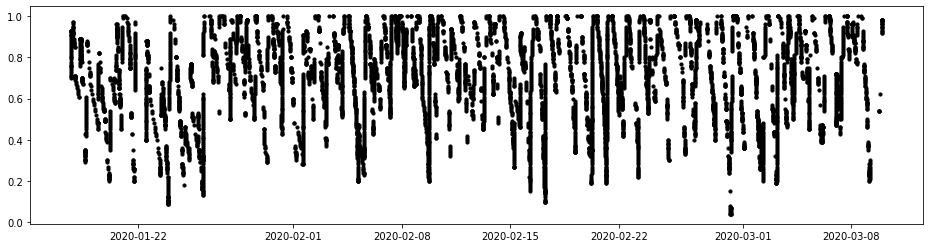

In [9]:
fig, ax = plt.subplots(figsize=(16,4))
ax.scatter(pt_df.index, pt_df['level'],s=10,color='black')
plt.show()
plt.close()

### Downsampling analysis

Can't really do any downsampling because it only adds data for the file when something new happens (or so the beiwe platform wiki tells us)

# Processing Pipeline

In [10]:
data_dir = '/Volumes/HEF_Dissertation_Research/utx000/bpeace1/beiwe/power_state/'
ps_df = pd.DataFrame()
for pt in os.listdir(data_dir)[:4]:
    if len(pt) == 8:
        print(f'\t\tWorking for participant {pt}')
        pt_df = pd.DataFrame()
        for file in os.listdir(f'{data_dir}{pt}/power_state/'):
            if file[-1] == 'v':
                temp = pd.read_csv(f'{data_dir}{pt}/power_state/{file}',parse_dates=[1],infer_datetime_format=True,engine='python')
                pt_df = pt_df.append(temp)
            
        pt_df['UTC time'] = pd.to_datetime(pt_df['UTC time'])
        pt_df['Time'] = pt_df['UTC time'] - timedelta(hours=6)
        pt_df.set_index('Time',inplace=True)
        pt_df['Beiwe'] = pt
        
        ps_df = ps_df.append(pt_df)
    
ps_df.head()

		Working for participant 25rlmdr1
		Working for participant 286vqdjn
		Working for participant 2ulkphrb


,timestamp,UTC time,event,Beiwe,level
Time,,,,,
2020-01-24 17:40:37.506,1579909237506,2020-01-24 23:40:37.506,Screen turned on,25rlmdr1,NaN
2020-01-24 17:49:16.138,1579909756138,2020-01-24 23:49:16.138,Screen turned off,25rlmdr1,NaN
2020-01-24 17:49:57.435,1579909797435,2020-01-24 23:49:57.435,Screen turned on,25rlmdr1,NaN
2020-01-24 17:50:12.113,1579909812113,2020-01-24 23:50:12.113,Screen turned off,25rlmdr1,NaN
2020-01-24 17:53:28.486,1579910008486,2020-01-24 23:53:28.486,Screen turned on,25rlmdr1,NaN
